In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from '/Users/tomas/PycharmProjects/uib-machine-learning/assignment-2/src/util.py'>

In [3]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [4]:
downsampled_X, downsampled_y, unique_classes_downsampled, class_counts_downsampled = utils.downsampling(X, y)

In [5]:
# Sample a smaller portion of the data (e.g., 10,000 samples)
# Ideal sample size Sample linear model -> sample_size = 8700 -> 88,5%
# Ideal sample size Sample linear model (balanced data set) -> sample_size = 1000 -> 84-87%
sample_size = 10000
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, train_size=sample_size, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Finding the best hyperparameter combination for Random Forest Model with GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
randomForest_model = RandomForestClassifier()
# Performing a grid search in order to find the best combination of hyperparameters for model outcome
grid_search = GridSearchCV(estimator=randomForest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)



Random Forest Validation Accuracy:  0.8773333333333333


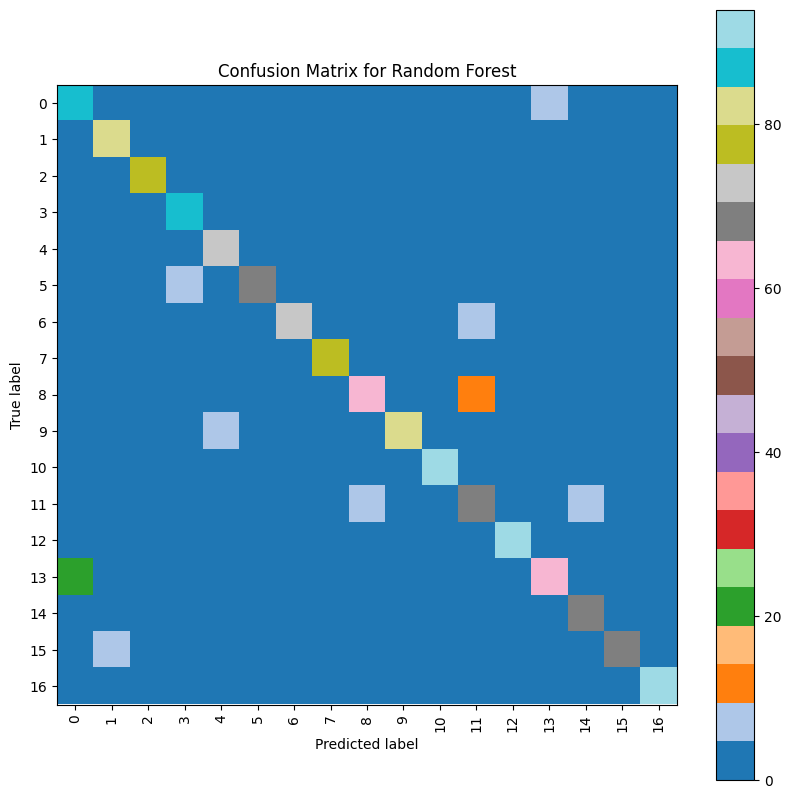

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on validation data
rf_prediction = rf_model.predict(X_val)

# Evaluate the model
rf_val_accuracy = accuracy_score(y_val, rf_prediction)
rf_val_classification_report = classification_report(y_val, rf_prediction)

# Print validation evaluation results for Random Forest
print("Random Forest Validation Accuracy: ", rf_val_accuracy)
#print("Random Forest Validation Classification Report: ")
#print(rf_val_classification_report)

# Create a confusion matrix for Random Forest
rf_cm = metrics.confusion_matrix(y_val, rf_prediction)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(10, 10))
labels_rf = np.unique(y_val)
tick_marks_rf = np.arange(len(labels_rf))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(rf_cm, interpolation='nearest', cmap=plt.cm.tab20)
plt.colorbar()
_ = plt.xticks(tick_marks_rf, labels_rf, rotation=90)
_ = plt.yticks(tick_marks_rf, labels_rf)
plt.title('Confusion Matrix for Random Forest')
plt.savefig("confusion_matrix_rf.png", dpi=300)
plt.show()
